In [2]:
#importing libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from xgboost import XGBRegressor

In [3]:
#reading file:
df=pd.read_csv(r'C:\Users\maryom\Desktop\cleaned_df.csv')
df.head()

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0


In [4]:
#checking the data info :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 14 columns):
State             22681 non-null object
City              22681 non-null object
Street            22681 non-null object
Zipcode           22681 non-null float64
Bedroom           22667 non-null float64
Bathroom          22647 non-null float64
Area              22681 non-null float64
PPSq              22681 non-null float64
LotArea           21779 non-null float64
MarketEstimate    15445 non-null float64
RentEstimate      16705 non-null float64
Latitude          22681 non-null float64
Longitude         22681 non-null float64
ListedPrice       22681 non-null float64
dtypes: float64(11), object(3)
memory usage: 2.4+ MB


In [5]:
# check for null values:
null=df.isna().sum()
null


State                0
City                 0
Street               0
Zipcode              0
Bedroom             14
Bathroom            34
Area                 0
PPSq                 0
LotArea            902
MarketEstimate    7236
RentEstimate      5976
Latitude             0
Longitude            0
ListedPrice          0
dtype: int64

In [6]:
#cleaning the data from null values:
df1=df.dropna()
df1.reset_index()
df1.shape

(14853, 14)

In [7]:
#checking for duplicated values:
df_duplicate=df1.duplicated().sum()
df_duplicate

0

In [8]:
#checking the data statistics:
df1.describe()

,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
count,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,1.485300e+04,14853.000000,14853.000000,14853.000000,1.485300e+04
mean,50250.285936,3.422676,2.436316,2126.205750,220.781355,2.054488,4.877222e+05,2658.375412,40.044983,-92.911684,4.992057e+05
std,29606.419403,0.993530,1.083066,1222.590629,186.519675,12.897134,1.015679e+06,3684.731713,5.944137,17.500758,1.105556e+06
min,1002.000000,0.000000,0.000000,240.000000,5.883276,0.000000,1.570000e+04,155.000000,25.449816,-161.772780,1.490000e+04
25%,25425.000000,3.000000,2.000000,1424.000000,134.770642,0.177410,2.340000e+05,1694.000000,36.097733,-103.738080,2.390000e+05
50%,52302.000000,3.000000,2.000000,1876.000000,184.380403,0.290000,3.454000e+05,2199.000000,39.963750,-89.799920,3.499000e+05
75%,75704.000000,4.000000,3.000000,2496.000000,254.131356,0.900000,5.036000e+05,2875.000000,42.980434,-79.000626,5.000000e+05
max,99950.000000,18.000000,14.000000,25496.000000,5379.236148,700.000000,3.687690e+07,176194.000000,65.044370,-67.016030,4.000000e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000549E978>,
      dtype=object)

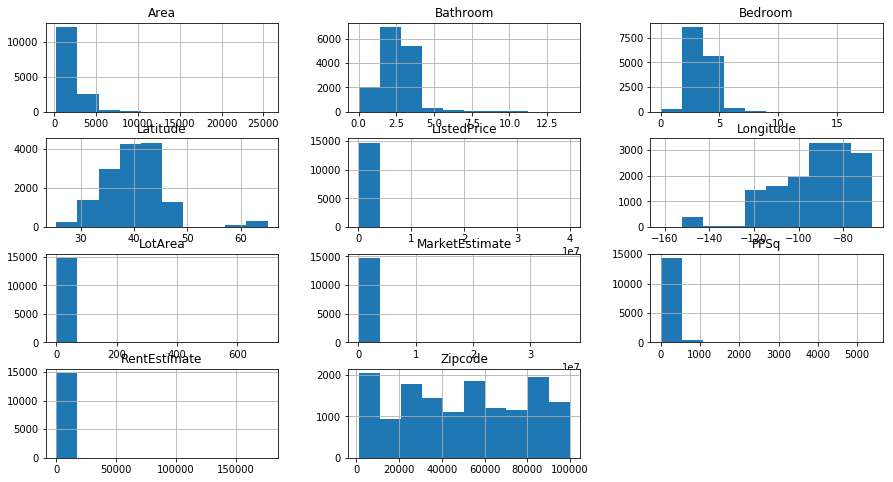

In [40]:
#ploting the data:
df1.hist(figsize=(15,8))

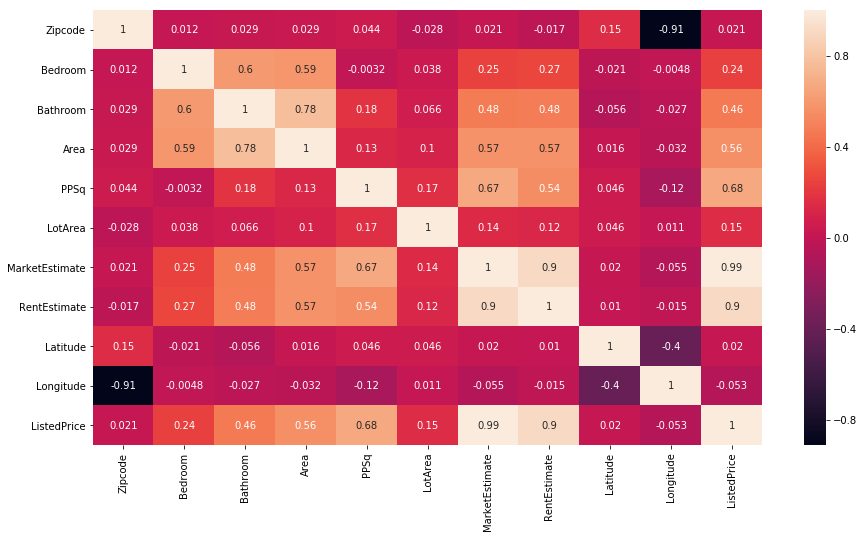

In [39]:
#analyze the correlation:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True)

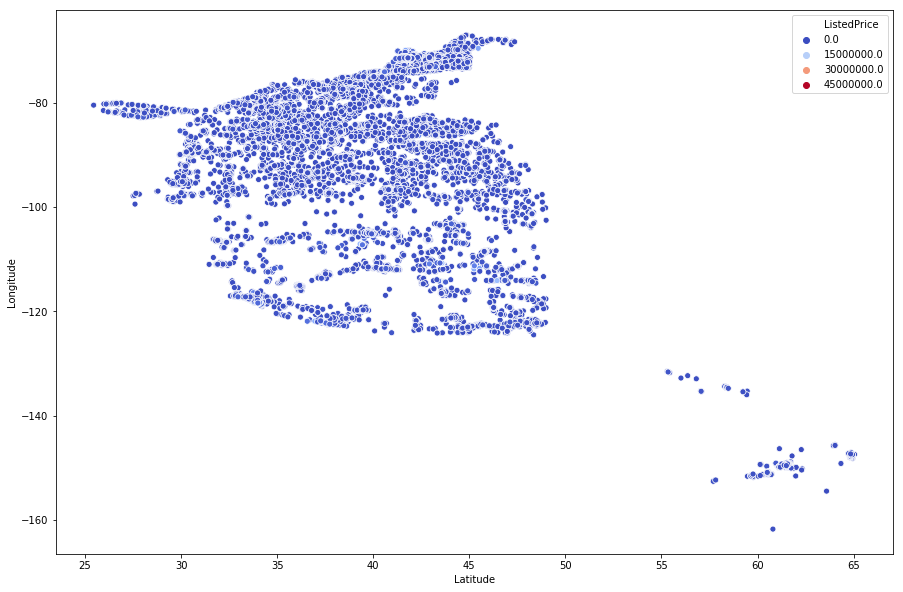

In [38]:
plt.figure(figsize = (15,10))
sns.scatterplot(x='Latitude',y='Longitude',data=df1,hue='ListedPrice',palette='coolwarm')

In [15]:
# analyzing the outliers:
q1=df1['ListedPrice'].quantile(0.25)
q3=df1['ListedPrice'].quantile(0.75)
iqr=q3-q1 #interquantile range
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
outliers_low=df1[(df1['ListedPrice']<lower_limit)] 
outliers_high=df1[(df1['ListedPrice']>upper_limit)] 

In [16]:
#outliers below lower limit:
len(outliers_low)

0

In [17]:
#outliers higher than upper limit:
len(outliers_high)

1027

In [18]:
# drop the outliers:
z=df1['ListedPrice'].clip(lower_limit,upper_limit)
df2=df1[df1['ListedPrice']==z]
len(df2)

13826

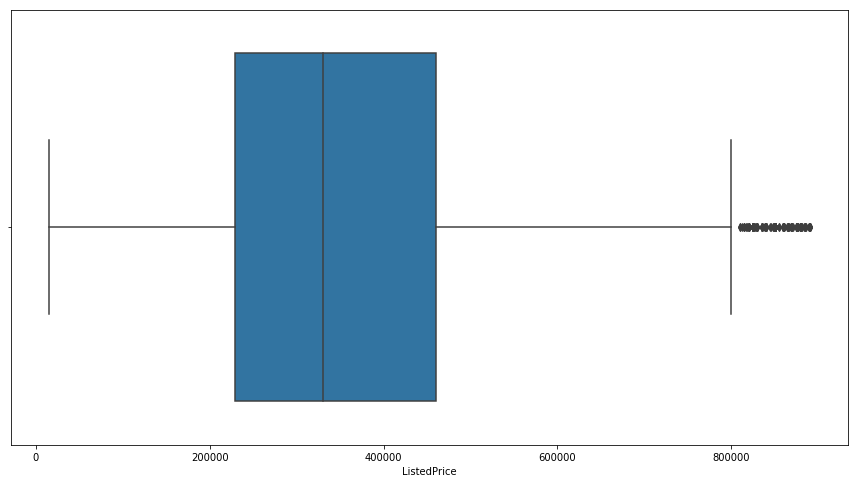

In [20]:
# visualize the data after cleaning:
plt.figure(figsize=(15,8))
sns.boxplot(df2['ListedPrice'])

In [28]:
# prepare the data for the model dropping unneeded columns :
df3=df2.drop(['State','Street','City'],axis=1)
df3.head()


,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,36571.0,4.0,2.0,1614.0,148.636927,0.380500,240600.0,1599.0,30.819534,-88.095960,239900.0
3,35043.0,3.0,3.0,2224.0,150.629496,0.260000,336200.0,1932.0,33.357986,-86.608700,335000.0
5,36117.0,3.0,2.0,1564.0,96.547315,0.200000,150500.0,1385.0,32.372746,-86.165115,151000.0
6,35957.0,3.0,2.0,1717.0,139.196273,0.380000,238400.0,2125.0,34.210014,-86.136690,239000.0
7,35950.0,3.0,2.0,1674.0,149.283154,0.344353,248000.0,1597.0,34.275400,-86.217920,249900.0


In [29]:
# data split for model:
x=df3.drop(columns=['ListedPrice'])
y=df3['ListedPrice']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [31]:
#tree model:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
predictions=tree_model.predict(x_test)
score=accuracy_score(y_test,predictions)
score

0.046276211135213303

In [32]:
#using xgb regression model:
model=XGBRegressor()
#tranining the model with x_train & y_train:
model.fit(x_train,y_train)
#evaluating the model:
y_pre=model.predict(x_test)

In [33]:
# mean squared error MSE:
mse_xg= metrics.r2_score(y_test,y_pre)
mse_xg

0.9908975055289058

In [34]:
#linear model:
lm=LinearRegression()
lm.fit(x_train, y_train)
score_1=lm.score(x_test,y_test)
score_1

0.9854463127464484

In [35]:
y_pred=lm.predict(x_test)

In [36]:
# mean squared error MSE:
mse= metrics.r2_score(y_test,y_pred)
mse

0.9854463127464484

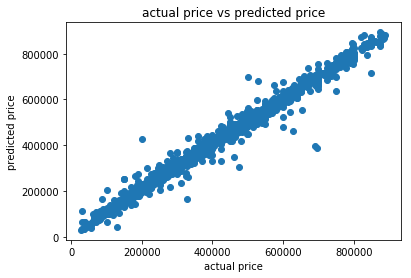

In [37]:
#visualizing the actual price and predicted price :
plt.scatter(y_test,y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted price')
plt.show()